### Loading libraries

In [ ]:
##python -m ipykernel install --user --name mykernel

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [4]:
print(tf.__version__)

2.0.0-alpha0


### Input Data

In [3]:
observations = 1000
xs=np.random.uniform(-10,10,size=(observations,1))
zs=np.random.uniform(-10,10,size=(observations,1))

generated_inputs=np.column_stack((xs,zs))
noise=np.random.uniform(-1,1,size=(observations,1))

generated_targets=2*xs-3*zs+5+noise

np.savez('TF_intro',inputs=generated_inputs,targets=generated_targets)

In [4]:
training_data=np.load('TF_intro.npz')

### Solving using Tensorflow

In [15]:
input_size=2
output_size=1



1


In [24]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(output_size,
                          kernel_initializer=tf.random_uniform_initializer(minval=-0.1,maxval=0.1),
                          bias_initializer=tf.random_uniform_initializer(minval=-0.1,maxval=0.1),
                         
                         ) ])

custom_optimizer= tf.keras.optimizers.SGD(learning_rate=0.02)
model.compile(optimizer=custom_optimizer,loss='mean_squared_error')
model.fit(training_data['inputs'],training_data['targets'],epochs=100,verbose=2)

Epoch 1/100
1000/1000 - 0s - loss: 32.7625
Epoch 2/100
1000/1000 - 0s - loss: 1.3194
Epoch 3/100
1000/1000 - 0s - loss: 0.4845
Epoch 4/100
1000/1000 - 0s - loss: 0.3696
Epoch 5/100
1000/1000 - 0s - loss: 0.3773
Epoch 6/100
1000/1000 - 0s - loss: 0.3747
Epoch 7/100
1000/1000 - 0s - loss: 0.3723
Epoch 8/100
1000/1000 - 0s - loss: 0.3885
Epoch 9/100
1000/1000 - 0s - loss: 0.3806
Epoch 10/100
1000/1000 - 0s - loss: 0.4046
Epoch 11/100
1000/1000 - 0s - loss: 0.3924
Epoch 12/100
1000/1000 - 0s - loss: 0.3944
Epoch 13/100
1000/1000 - 0s - loss: 0.3868
Epoch 14/100
1000/1000 - 0s - loss: 0.3750
Epoch 15/100
1000/1000 - 0s - loss: 0.3739
Epoch 16/100
1000/1000 - 0s - loss: 0.3728
Epoch 17/100
1000/1000 - 0s - loss: 0.3674
Epoch 18/100
1000/1000 - 0s - loss: 0.3800
Epoch 19/100
1000/1000 - 0s - loss: 0.3726
Epoch 20/100
1000/1000 - 0s - loss: 0.3940
Epoch 21/100
1000/1000 - 0s - loss: 0.3844
Epoch 22/100
1000/1000 - 0s - loss: 0.3869
Epoch 23/100
1000/1000 - 0s - loss: 0.3535
Epoch 24/100
1000/1

### Extract weight and bias

In [25]:
model.layers[0].get_weights()

[array([[ 1.988443],
        [-2.980773]], dtype=float32), array([5.0352573], dtype=float32)]

In [26]:
weights=model.layers[0].get_weights()[0]
weights

array([[ 1.988443],
       [-2.980773]], dtype=float32)

In [27]:
bias=model.layers[0].get_weights()[1]
bias

array([5.0352573], dtype=float32)

### Make predictions

In [28]:
model.predict_on_batch(training_data['inputs'])

array([[ 1.89155540e+01],
       [ 1.72346611e+01],
       [ 4.55350876e+00],
       [-7.05653000e+00],
       [ 4.42986755e+01],
       [-8.96374893e+00],
       [ 2.44566345e+00],
       [ 2.49802208e+01],
       [-2.47017689e+01],
       [ 2.49525661e+01],
       [ 3.16318645e+01],
       [ 1.87874222e+01],
       [ 1.48939905e+01],
       [-1.64737339e+01],
       [ 2.92793045e+01],
       [ 3.97955627e+01],
       [ 2.23601246e+01],
       [ 3.92247925e+01],
       [-1.98921852e+01],
       [ 5.84504747e+00],
       [ 4.97086258e+01],
       [ 4.31475067e+01],
       [ 2.91848125e+01],
       [ 3.08301334e+01],
       [ 3.27924194e+01],
       [ 2.91060886e+01],
       [-6.16911983e+00],
       [ 1.14387131e+01],
       [ 4.36019897e-03],
       [ 1.31848001e+01],
       [ 2.45817070e+01],
       [ 1.38593102e+01],
       [-8.30956841e+00],
       [-3.40040359e+01],
       [-1.05913181e+01],
       [-1.34167538e+01],
       [ 1.36158657e+01],
       [-2.86668911e+01],
       [ 4.5

### Plotting the data 

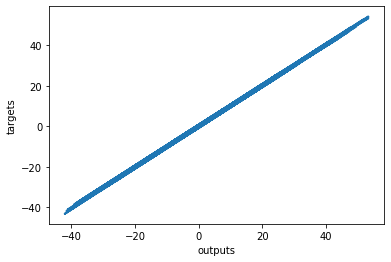

In [29]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])),np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()